<a href="https://colab.research.google.com/github/pakkei1212/SMU_AML_PROJ/blob/main/Hotel_Bookings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References:

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [35]:
#@title connect google drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SMU_MITB_AML_PRO/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SMU_MITB_AML_PRO


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [37]:
raw_data = pd.read_csv("hotel_bookings.csv")
hotel_data = raw_data.copy()

In [38]:
# Print the count of each class (0 = not canceled, 1 = canceled)
print(hotel_data['is_canceled'].value_counts())

# count of each class grouped by hotel
print(hotel_data.groupby('hotel')['is_canceled'].value_counts())

# Print the proportion (percentage) of each class to understand class balance
print(hotel_data['is_canceled'].value_counts(normalize=True))

# proportion of each class grouped by hotel
print(hotel_data.groupby('hotel')['is_canceled'].value_counts(normalize=True))

# table to combine count and proportion
pd.crosstab(hotel_data['is_canceled'], hotel_data['hotel'], normalize='index')

is_canceled
0    75166
1    44224
Name: count, dtype: int64
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


In [39]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [40]:
hotel_data.shape

(119390, 32)

In [41]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [42]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Unique values of the objects

In [43]:
# Select object (string) columns
object_cols = hotel_data.select_dtypes(include='object').columns

# Print unique values for each object column
for col in object_cols:
    unique_vals = hotel_data[col].dropna().unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Unique values: {unique_vals}")

print(hotel_data['agent'].unique())
print(hotel_data['company'].unique())


Column: hotel
Number of unique values: 2
Unique values: ['Resort Hotel' 'City Hotel']

Column: arrival_date_month
Number of unique values: 12
Unique values: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Column: meal
Number of unique values: 5
Unique values: ['BB' 'FB' 'HB' 'SC' 'Undefined']

Column: country
Number of unique values: 177
Unique values: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' '

# Data Cleaning

In [44]:
hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [45]:
num_duplicates = hotel_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 31994


In [46]:
hotel_data.shape

(119390, 32)

# Data Imputation and Manipulation¶

**Filling children and agent missing values with median values**

In [47]:
def impute_median(series):
    print(series.median())
    return series.fillna(series.median())

In [48]:
hotel_data.children = hotel_data['children'].transform(impute_median)
# isn't this Number of children - so if null should be replaced with 0
# since most children are 0, mode, median are also 0

0.0
14.0


In [ ]:
hotel_data.agent = hotel_data['agent'].astype('object')
hotel_data.agent = hotel_data['agent'].fillna('Not Specified')

In [49]:
hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


**Filling country missing values with mode**

In [50]:
print(hotel_data['country'].mode()) # fill country with most common country code

0    PRT
Name: country, dtype: object


In [51]:
hotel_data['country'].fillna(str(hotel_data['country'].mode()[0]),inplace=True)

<ipython-input-51-0d37129ff6d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['country'].fillna(str(hotel_data['country'].mode()[0]),inplace=True)


In [52]:
hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [53]:
hotel_data.drop_duplicates(inplace=True)

In [54]:
num_duplicates = hotel_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [55]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87377 non-null  object 
 1   is_canceled                     87377 non-null  int64  
 2   lead_time                       87377 non-null  int64  
 3   arrival_date_year               87377 non-null  int64  
 4   arrival_date_month              87377 non-null  object 
 5   arrival_date_week_number        87377 non-null  int64  
 6   arrival_date_day_of_month       87377 non-null  int64  
 7   stays_in_weekend_nights         87377 non-null  int64  
 8   stays_in_week_nights            87377 non-null  int64  
 9   adults                          87377 non-null  int64  
 10  children                        87377 non-null  float64
 11  babies                          87377 non-null  int64  
 12  meal                            8737

In [56]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


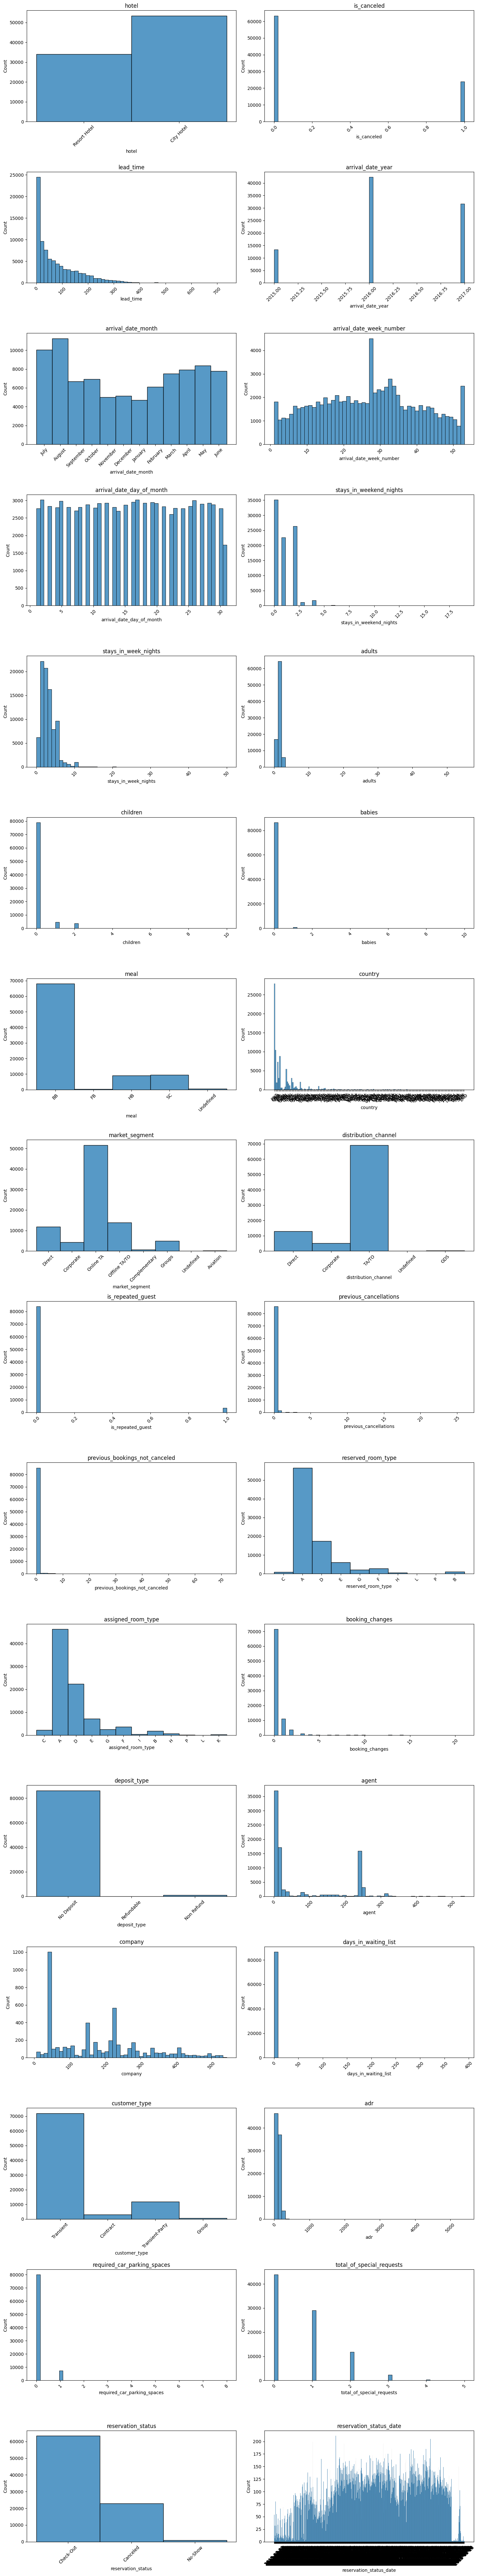

In [57]:
# Plot the histogram of the final features
plot_cols = [col for col in hotel_data.columns]

num_of_cols = 2
num_of_rows = (len(plot_cols) + num_of_cols - 1)// num_of_cols
fig_num, axes_num = plt.subplots(num_of_rows,
                                 num_of_cols,
                                 figsize=(15, 5*num_of_rows))

for ax, col in zip(axes_num.flatten(), plot_cols):
    # Check if the column is categorical and has the 'Other' category
    if col in []:
        sns.countplot(data=hotel_data, x=col, ax=ax)
    else:
        # Use histplot for numerical columns or other categorical columns
        sns.histplot(hotel_data[col], bins=50, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering

In [58]:
def extract_features(df):
  df['is_canceled'] = df['is_canceled'].astype(int)

  df['lead_time_log'] = np.log1p(df['lead_time'])
  df['booking_changes_log'] = np.log1p(df['booking_changes'])

  season_map = {
      'December': 'Winter',
      'January': 'Winter',
      'February': 'Winter',
      'March': 'Spring',
      'April': 'Spring',
      'May': 'Spring',
      'June': 'Summer',
      'July': 'Summer',
      'August': 'Summer',
      'September': 'Fall',
      'October': 'Fall',
      'November': 'Fall'
  }

  '''month_map = {
      'December': 12,
      'January': 1,
      'February': 2,
      'March': 3,
      'April': 4,
      'May': 5,
      'June': 6,
      'July': 7,
      'August': 8,
      'September': 9,
      'October': 10,
      'November': 11
  }'''

  df['arrival_date_season'] = df['arrival_date_month'].map(season_map)
  #df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

  meal = {
    'BB': 1,
    'HB': 1,
    'FB': 1,
    'SC': 0,
    'Undefined': 0
  }

  df['meal_bin'] = df['meal'].apply(lambda x: meal[x])
  df['total_guests'] = df['adults'] + df['children'].astype(int) + df['babies']
  df['room_type_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)
  top_N_countries = hotel_data['country'].value_counts().nlargest(10).index
  print(f"Top 10 Frequent Countries: {top_N_countries}")
  df['country_binned'] = df['country'].apply(lambda x: x if x in top_N_countries else 'Other')
  #df['is_local'] = df['country'].apply(lambda x: 1 if x == 'PRT' else 0)
  return df

In [59]:
def normalize(df):
  # Normalize numerical columns
  numeric_cols = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

  scaler = MinMaxScaler()
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

  # One-hot encode categorial columns
  cat_cols = df.select_dtypes(include=['object']).columns
  print(cat_cols)
  df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype='int')

  return df

In [60]:
def drop_columns(df):
  dropped_cols = ['company',
                  'arrival_date_week_number',
                  'reservation_status_date',
                  'reservation_status',
                  'meal',
                  'country'
                  ]
  df.drop(dropped_cols, inplace=True,axis=1, errors='ignore')
  return df

**Drop Unnecessary Columns**

In [61]:
hotel_data = extract_features(hotel_data)
hotel_data = drop_columns(hotel_data)
hotel_data = normalize(hotel_data)

Top 10 Frequent Countries: Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD'], dtype='object', name='country')
Index(['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'arrival_date_season', 'country_binned'],
      dtype='object')


In [62]:
hotel_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,country_binned_BRA,country_binned_DEU,country_binned_ESP,country_binned_FRA,country_binned_GBR,country_binned_IRL,country_binned_ITA,country_binned_NLD,country_binned_Other,country_binned_PRT
0,0.0,0.464043,0.0,0.0,0.0,0.00,0.036364,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,1.000000,0.0,0.0,0.0,0.00,0.036364,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.009498,0.0,0.0,0.0,0.02,0.018182,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,0.017639,0.0,0.0,0.0,0.02,0.018182,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0.018996,0.0,0.0,0.0,0.04,0.036364,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87377 non-null  float64
 1   lead_time                       87377 non-null  float64
 2   arrival_date_year               87377 non-null  float64
 3   arrival_date_day_of_month       87377 non-null  float64
 4   stays_in_weekend_nights         87377 non-null  float64
 5   stays_in_week_nights            87377 non-null  float64
 6   adults                          87377 non-null  float64
 7   children                        87377 non-null  float64
 8   babies                          87377 non-null  float64
 9   is_repeated_guest               87377 non-null  float64
 10  previous_cancellations          87377 non-null  float64
 11  previous_bookings_not_canceled  87377 non-null  float64
 12  booking_changes                 8737

# Output Cleaned Data to CSV

In [64]:
hotel_data.to_csv('hotel_data_cleaned.csv', index=False)

# Co-relarations of Features

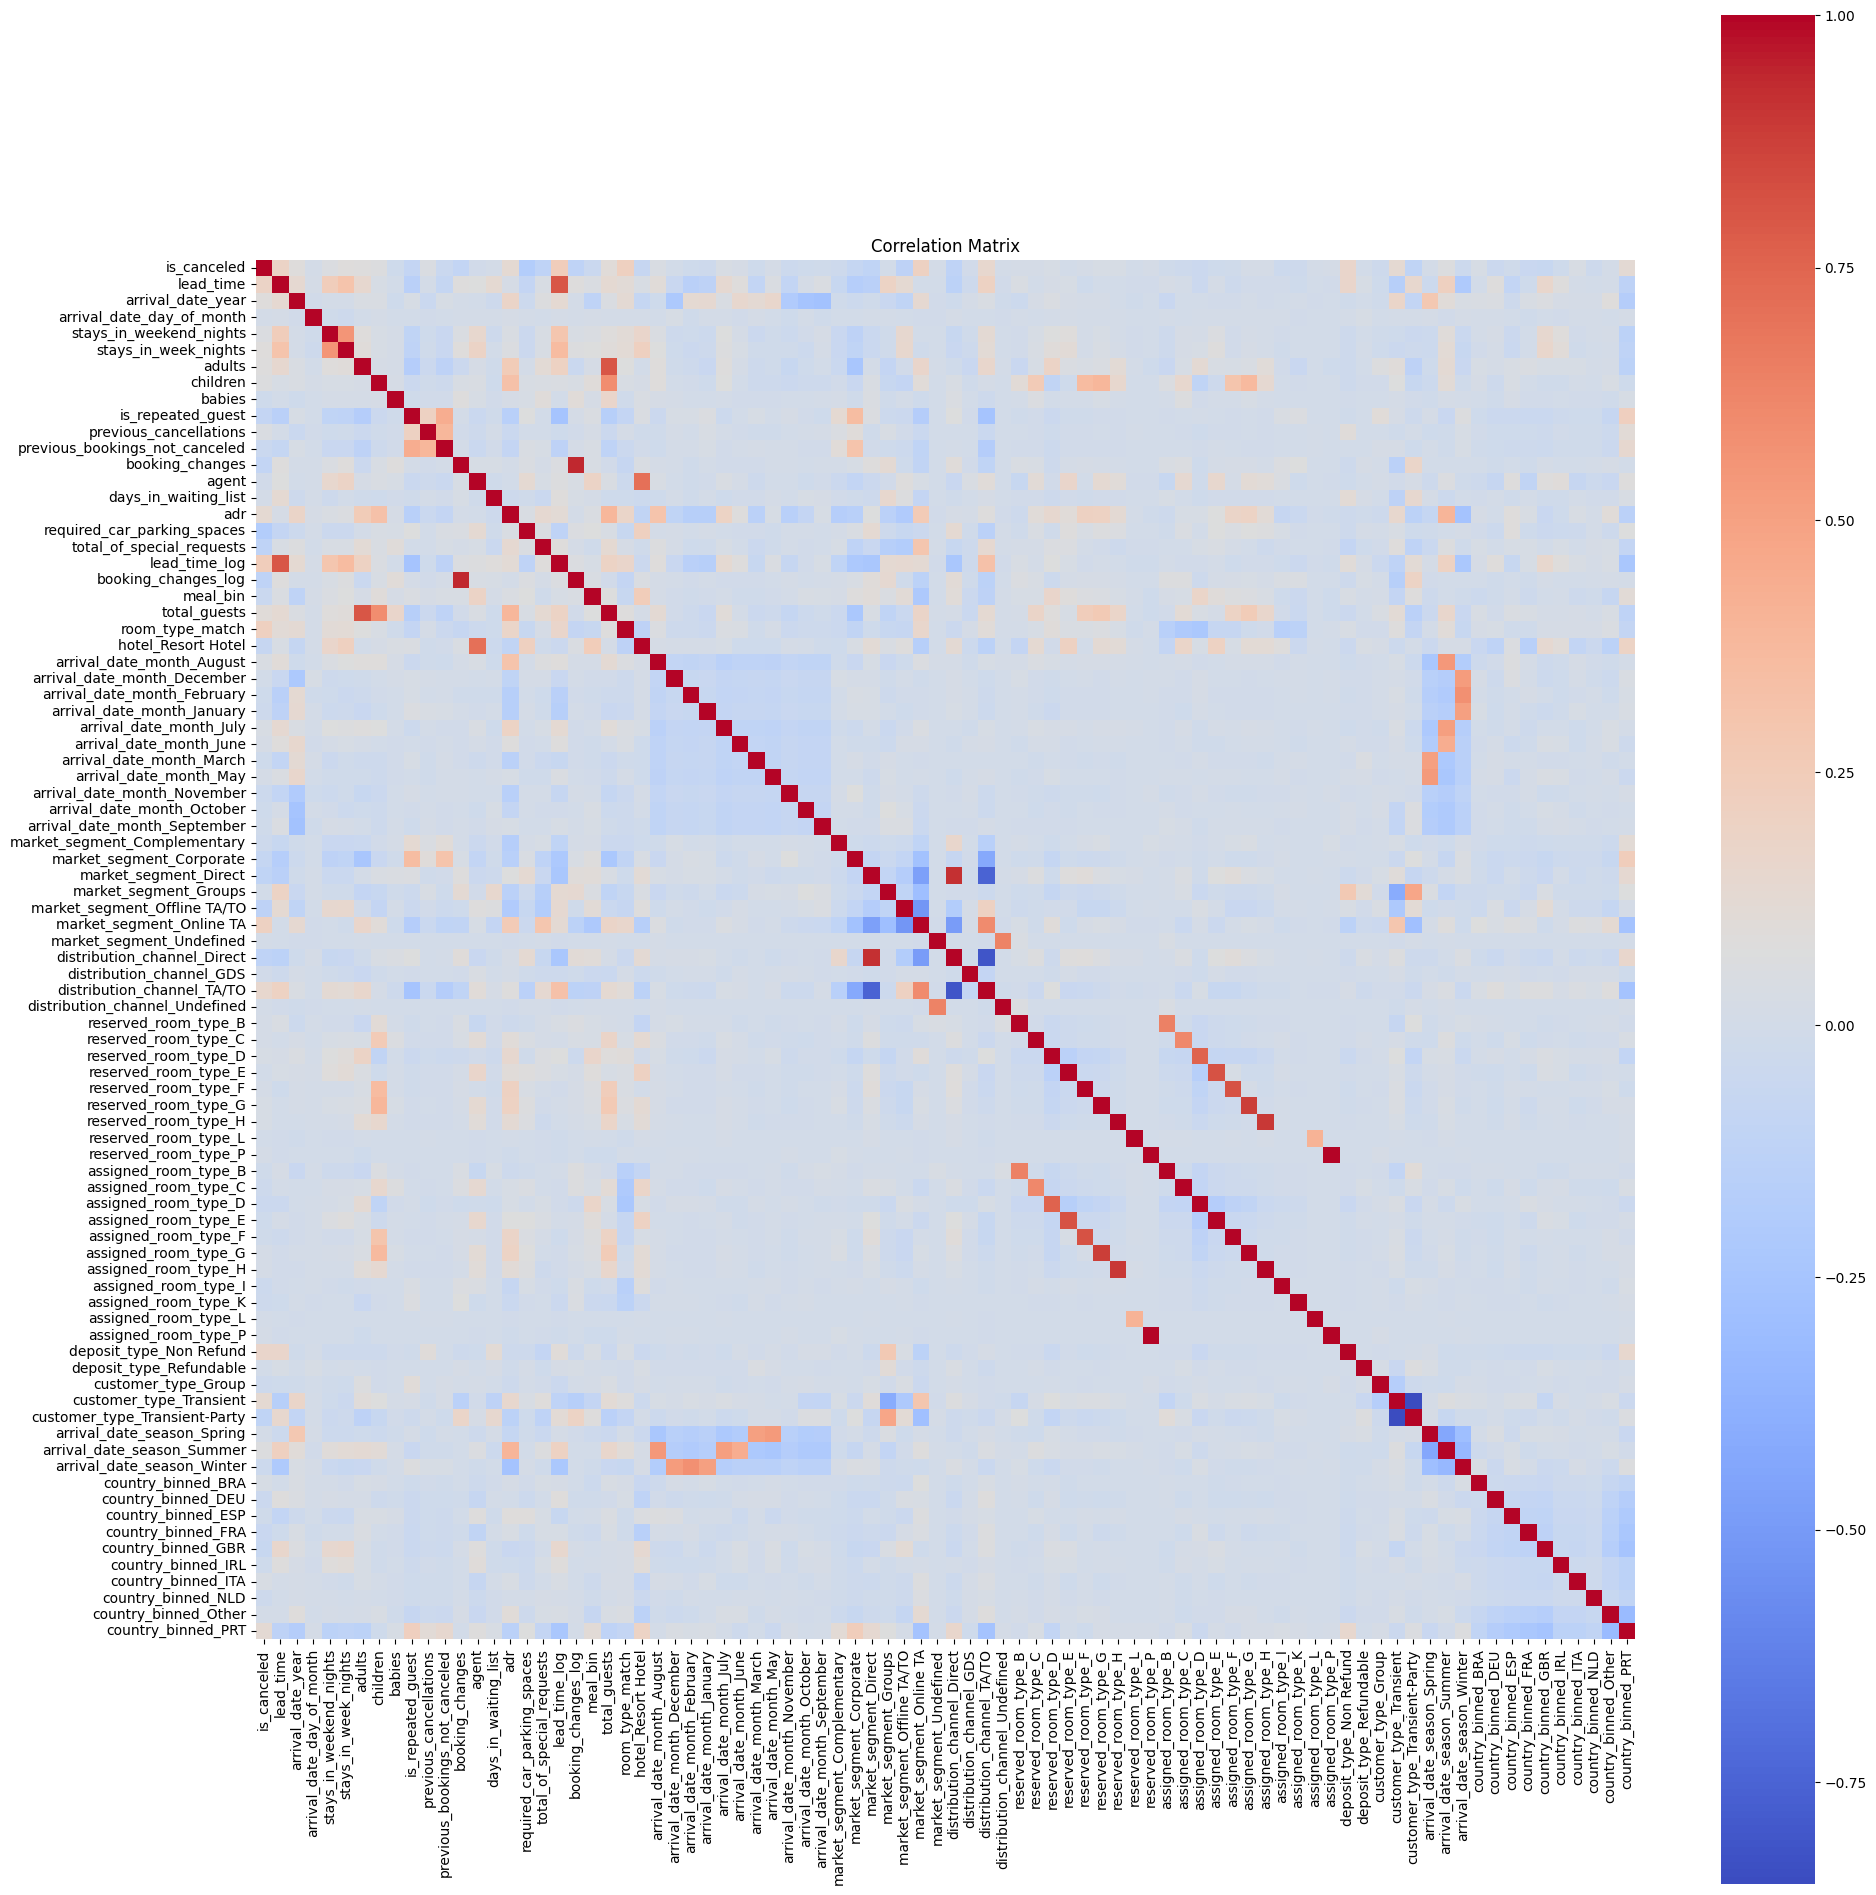

In [65]:
# Compute correlation matrix
corr_matrix = hotel_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Test of XGBooast

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

# Copy data to avoid modifying original
df = hotel_data.copy()

# Define label
y = df['is_canceled']

# Drop label and non-informative columns (optional)
X = df.drop(columns=['is_canceled'])

# Separate columns by type
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Full pipeline with XGBoost
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1
    ))
])

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Predict using cross-validation
y_pred = cross_val_predict(model_pipeline, X, y, cv=cv)

# Evaluate
print("📋 Classification Report:")
print(classification_report(y, y_pred))

print(f"✅ Accuracy: {accuracy_score(y, y_pred):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     63353
         1.0       0.76      0.66      0.70     24024

    accuracy                           0.85     87377
   macro avg       0.82      0.79      0.80     87377
weighted avg       0.84      0.85      0.84     87377

✅ Accuracy: 0.8476
